In [8]:
import pandas as pd
import matplotlib.pyplot as plt
# from scipy.stats import pearsonr

#create DataFrame
df = pd.read_csv('data/2023-obs.csv', sep=';')# Convert the 'date' column with format 'yy-mm-dd' to datetime format
df['date'] = pd.to_datetime(df['date'], format='%y-%m-%d')

In [7]:
summary_stats = df.describe()
print(summary_stats)


          overall  sociability      health      energy  happiness  positivity  \
count  315.000000   257.000000  263.000000  258.000000  15.000000  277.000000   
mean     8.692381     8.836187    8.674144    8.605039   8.633333    8.874007   
std      0.572629     0.436040    0.615959    0.568921   0.762202    0.577077   
min      6.500000     7.000000    6.200000    6.000000   7.000000    6.800000   
25%      8.400000     8.700000    8.400000    8.300000   8.100000    8.600000   
50%      8.700000     8.900000    8.800000    8.700000   8.600000    9.000000   
75%      9.000000     9.100000    9.000000    9.000000   9.350000    9.300000   
max      9.900000     9.800000    9.700000    9.700000   9.500000    9.900000   

       productivity     purpose  engagement  readiness  stimulation  
count    245.000000  255.000000   38.000000  20.000000     7.000000  
mean       8.177551    8.566667    8.434211   8.440000     8.442857  
std        0.553996    0.560675    0.509518   0.369067     0

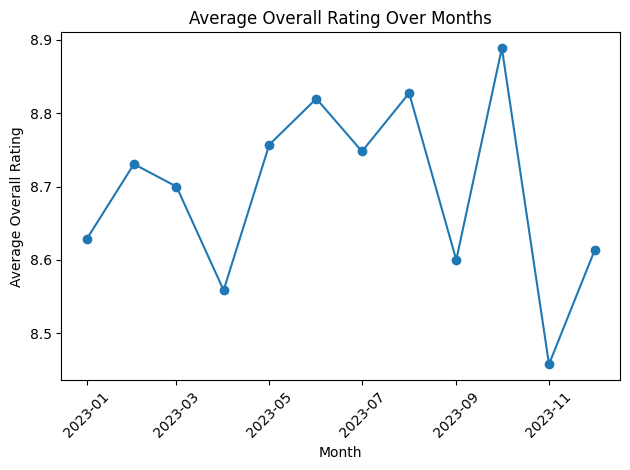

In [29]:
# Convert the 'date' column with format 'yy-mm-dd' to datetime format
df['date'] = pd.to_datetime(df['date'], format='%y-%m-%d')

# Create a new column 'Month' to extract the month from the date
df['month'] = df['date'].dt.to_period('M').dt.to_timestamp()

# Calculate the average overall rating for each month
monthly_avg = df.groupby('month')['overall'].mean().reset_index()

# Plot the graph
plt.figure()
plt.plot(monthly_avg['month'], monthly_avg['overall'], marker='o')
plt.title('Average Overall Rating Over Months')
plt.xlabel('Month')
plt.ylabel('Average Overall Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

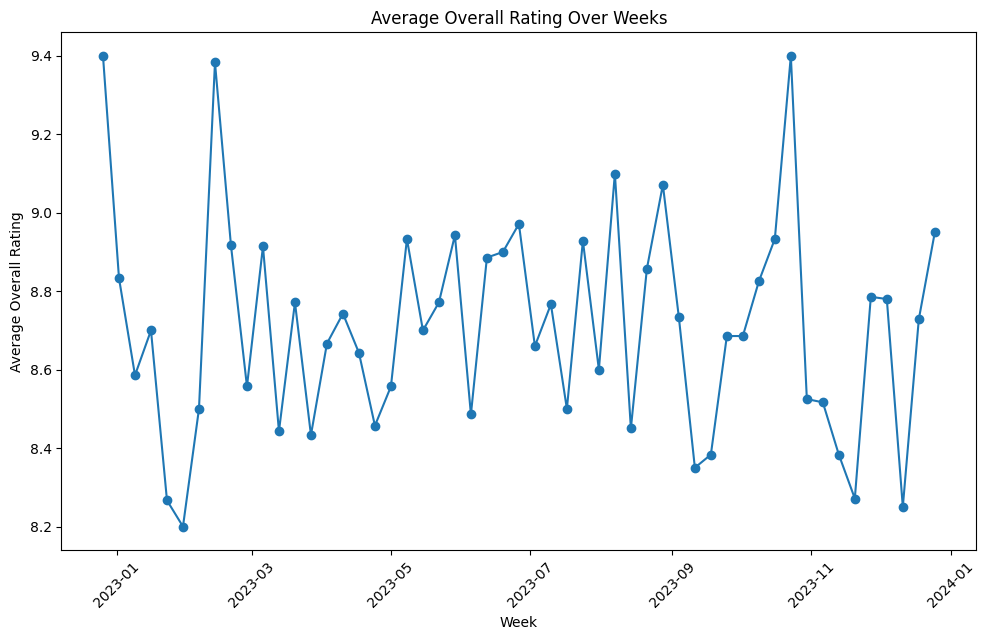

In [31]:
# Create a new column 'Week' to extract the week from the date
df['week'] = df['date'].dt.to_period('W').dt.to_timestamp()

# Calculate the average overall rating for each week
weekly_avg = df.groupby('week')['overall'].mean().reset_index()

# Plot the graph
plt.figure()
plt.plot(weekly_avg['week'], weekly_avg['overall'], marker='o')
plt.title('Average Overall Rating Over Weeks')
plt.xlabel('Week')
plt.ylabel('Average Overall Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/m1/wpds60495c9_z88fhcc4gw_c0000gn/T/ipykernel_49804/3182471796.py:45: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot_date(x_daily, y_daily, marker='o')


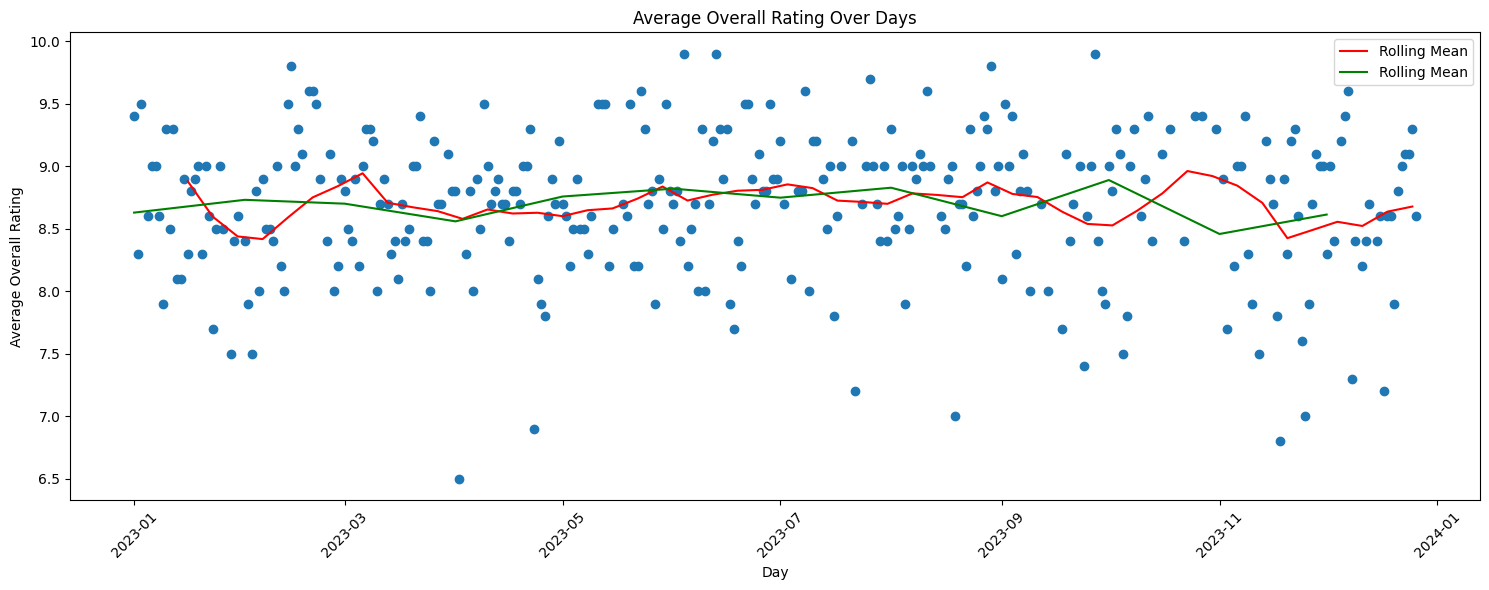

In [30]:
import numpy as np
from scipy import stats
from matplotlib import dates as mdates

# Create a new column 'Day' to extract the day from the date
df['day'] = df['date'].dt.to_period('D').dt.to_timestamp()

# Calculate the average overall rating for each day
daily_avg = df.groupby('day')['overall'].mean().reset_index()
daily_avg = daily_avg.dropna()

# Convert the 'day' column to numeric for trend line calculation
x_daily = mdates.date2num(daily_avg['day'])
y_daily = daily_avg['overall']
# Create a new column 'Week' to extract the week from the date
df['week'] = df['date'].dt.to_period('W').dt.to_timestamp()
# Calculate the average overall rating for each week
weekly_avg = df.groupby('week')['overall'].mean().reset_index()
weekly_avg = weekly_avg.dropna()
# Calculate the rolling mean with a window size of 4 (approximately a month)
weekly_avg['rolling_mean'] = weekly_avg['overall'].rolling(window=4).mean()

# Create a new column 'Month' to extract the month from the date
df['month'] = df['date'].dt.to_period('M').dt.to_timestamp()
# Calculate the average overall rating for each month
monthly_avg = df.groupby('month')['overall'].mean().reset_index()
monthly_avg = monthly_avg.dropna()
# Calculate the rolling mean with a window size of 4 (approximately a month)
monthly_avg['rolling_mean'] = monthly_avg['overall'].rolling(window=1).mean()

# Convert the 'week' column to numeric for trend line calculation
x = mdates.date2num(weekly_avg['week'])
y = weekly_avg['rolling_mean']

# Convert the 'month' column to numeric for trend line calculation
x_month = mdates.date2num(monthly_avg['month'])
y_month = monthly_avg['rolling_mean']

# Calculate the trend line (2nd degree polynomial)
z = np.polyfit(x_daily, y_daily, 2)
p = np.poly1d(z)

# Plot the graph
plt.figure(figsize=(15, 6))
plt.plot_date(x_daily, y_daily, marker='o')
plt.plot_date(x, y, 'r-', label='Rolling Mean (4 weeks)')
plt.plot_date(x_month, y_month, 'g-', label='Rolling Mean (1 month)')
# plt.plot_date(x, p(x), 'r-', label='y = {:.6f}x^2 + {:.6f}x + {:.6f}'.format(z[0],z[1],z[2]))
plt.title('Average Overall Rating Over Days')
plt.xlabel('Day')
plt.ylabel('Average Overall Rating')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [2]:

highest = {}
index = 0
cols = df.columns
cols = cols.drop('peak').drop('unique').drop('sleep').drop('wake')#.drop('date').drop('bottles drank').drop('times peed').drop('time slept').drop('time awaked').drop('total sleep time').drop('effectiveness (Am I SPENDING the RIGHT TIME)').drop('Sleep Min').drop('Sleep Hr').drop('Awake Hr').drop('% of planned output').drop("Time slept").drop("Time woken")
# calculate correlation coefficient between all cols with overall score
for j in range(0, len(cols)):
    if j == index or j == len(cols) + index:
        continue
    col1 = cols[index]
    col2 = cols[j]
    # try:
    # corr, p = pearsonr(df[col1].dropna(), df[col2].dropna())
    # except:
    corr = df[col1].corr(df[col2])
    # p=None
    highest[col2] = f'{corr}'#, {p}'

highest = sorted(highest.items(), key=lambda x: x[1], reverse=True)
print(f'Correlation coefficient between {cols[index]} and other columns: \n')
for k, v in highest:
    print(k, v, sep=':\t')

Correlation coefficient between overall and other columns: 

excitement:	1.0
moment:	0.9853990276561037
stimulation:	0.9114217401621496
integrity:	0.7841113141278143
uniqueness:	0.764251789479224
happiness:	0.7502998962257649
positivity:	0.7473778989541394
health:	0.7031296287047868
sociability:	0.587018065632474
engagement:	0.5815738790745991
purpose:	0.5620043038193793
energy:	0.4973089816533718
productivity:	0.30944955380389677
readiness:	0.05803213632249073


In [6]:
import pandas as pd

#create DataFrame
df = pd.read_csv('data/2022.csv')
highest = {}

cols = df.columns
cols = cols.drop('date').drop('bottles drank').drop('times peed').drop('time slept').drop('time awaked').drop('total sleep time').drop('effectiveness (Am I SPENDING the RIGHT TIME)').drop('Sleep Min').drop('Sleep Hr').drop('Awake Hr').drop('% of planned output').drop("Time slept").drop("Time woken")


# calculate correlation coefficient between all cols
for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        col1 = cols[i]
        col2 = cols[j]
        # try:
        # corr, p = pearsonr(df[col1].dropna(), df[col2].dropna())
        # except:
        corr = df[col1].corr(df[col2])
        # p=None
        highest[col1 + '-' + col2] = f'{corr}'#, {p}'

highest = sorted(highest.items(), key=lambda x: x[1], reverse=True)
for k, v in highest:
    if not (k == 'Steps-Distance' or k == 'Minutes Asleep-Time in Bed'):
        print(k, v, sep=':\t')

overall-happiness:	0.8951773030444721
Time in Bed-Minutes Light Sleep:	0.8558363546778726
Minutes Lightly Active-Activity Calories:	0.8483751340840137
Minutes Asleep-Minutes Light Sleep:	0.8481350107348729
Calories Burned-Steps:	0.8453448495529637
Calories Burned-Distance:	0.8431164527873529
Calories Burned-Activity Calories:	0.8348884367784775
Minutes Asleep-sleep duration score:	0.8285455023220815
Minutes Fairly Active-Activity Calories:	0.7987801652862327
sleep score-sleep duration score:	0.7972886351351555
Minutes Very Active-Activity Calories:	0.7972618080217573
Time in Bed-sleep duration score:	0.7960087322515169
Calories Burned-Minutes Fairly Active:	0.7577102347501551
Steps-Minutes Very Active:	0.7491432238417206
Minutes Awake-Number of Awakenings:	0.748998658278784
Minutes REM Sleep-sleep score:	0.7483706397734553
Distance-Minutes Very Active:	0.7419236264551471
Calories Burned-Minutes Very Active:	0.7328333469284078
Steps-Activity Calories:	0.7305000784959909
happiness-excite

In [ ]:
import pandas as pd
import glob
import os

path = r'/Users/rami/Library/CloudStorage/OneDrive-UniversityofCalgary/code/python/hello_ds/journal-data-analysis/2022-activity' # use your path

all_files = glob.glob(os.path.join(path, "*.csv"))
df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

# save to csv
df.to_csv('2022-a.csv', index=False, encoding='utf-8')

path = r'/Users/rami/Library/CloudStorage/OneDrive-UniversityofCalgary/code/python/hello_ds/journal-data-analysis/2022-sleep' # use your path

all_files = glob.glob(os.path.join(path, "*.csv"))
df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

# save to csv
df.to_csv('2022-s.csv', index=False, encoding='utf-8')

In [ ]:
# DANGEROUS, remove first line of all files in 'all_files'
for f in all_files:
    with open(f, 'r') as fin:
        data = fin.read().splitlines(True)
    with open(f, 'w') as fout:
        fout.writelines(data[1:])

In [ ]:
import pandas as pd

# Read in the two CSV files
df1 = pd.read_csv("2022-s.csv")
df2 = pd.read_csv("2022-a.csv")

# Merge the two dataframes on a common column
merged_df = df2.join(df1.set_index('Date'), on='Date')

# Save the merged dataframe to a new CSV file
merged_df.to_csv("2022-fb.csv", index=False)

In [9]:
with open('2022-m.csv', 'r') as fin:
    data = fin.read().splitlines(True)
    # get the number of times each date was mentioned
    dates = {}
    for date in data:
        date = date.strip()
        if date in dates:
            dates[date] += 1
        else:
            dates[date] = 1

In [5]:

import pandas as pd

# Read in the two CSV files
df1 = pd.read_csv("2022-fb.csv")
df2 = pd.read_csv("2022-jd.csv")

# Merge the two dataframes on a common column
merged_df = df2.join(df1.set_index('Date'), on='Date')

# add the number of times each date was mentioned to its row
merged_df['scrobbles'] = merged_df['Date'].map(dates)

# Save the merged dataframe to a new CSV file
merged_df.to_csv("2022.csv", index=False)

In [ ]:
import pandas as pd

# Read in the two CSV files
df1 = pd.read_csv("2022.csv")
df2 = pd.read_csv("sleepStress.csv")

# Merge the two dataframes on a common column
merged_df = df1.join(df2.set_index('Date'), on='Date')


# Save the merged dataframe to a new CSV file
merged_df.to_csv("2022.csv", index=False)